In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go



In [14]:
df = pd.read_csv("../stock_list.csv")
df.head()

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False


In [6]:
df.columns

Index(['SecuritiesCode', 'EffectiveDate', 'Name', 'Section/Products',
       'NewMarketSegment', '33SectorCode', '33SectorName', '17SectorCode',
       '17SectorName', 'NewIndexSeriesSizeCode', 'NewIndexSeriesSize',
       'TradeDate', 'Close', 'IssuedShares', 'MarketCapitalization',
       'Universe0'],
      dtype='object')

In [8]:
df.isna().sum()

SecuritiesCode              0
EffectiveDate               0
Name                        0
Section/Products            0
NewMarketSegment          645
33SectorCode                0
33SectorName                0
17SectorCode                0
17SectorName                0
NewIndexSeriesSizeCode      0
NewIndexSeriesSize          0
TradeDate                 296
Close                     296
IssuedShares              296
MarketCapitalization      296
Universe0                   0
dtype: int64

In [11]:
df['NewMarketSegment'].value_counts()

Prime Market                       1839
Standard Market                    1466
Growth Market                       461
Growth Market (Foreign Stock)         3
Standard Market (Foreign Stock)       2
Prime Market (Foreign Stock)          1
Name: NewMarketSegment, dtype: int64

In [19]:
df['IssuedShares'].value_counts()

6.000000e+06    7
2.000000e+06    6
6.000000e+04    6
5.500000e+06    5
1.000000e+05    5
               ..
1.655446e+09    1
1.397297e+07    1
9.362000e+05    1
4.116400e+06    1
3.424696e+07    1
Name: IssuedShares, Length: 4011, dtype: int64

In [12]:
df['TradeDate'].value_counts()

20211230.0    4049
20211229.0      37
20211228.0      18
20211227.0       6
20211220.0       3
20211221.0       2
20211222.0       2
20211223.0       2
20211216.0       1
20211224.0       1
Name: TradeDate, dtype: int64

(array([4.087e+03, 2.200e+01, 7.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([2.24200000e+03, 1.63150076e+09, 3.26299929e+09, 4.89449781e+09,
        6.52599633e+09, 8.15749485e+09, 9.78899337e+09, 1.14204919e+10,
        1.30519904e+10, 1.46834889e+10, 1.63149875e+10]),
 <BarContainer object of 10 artists>)

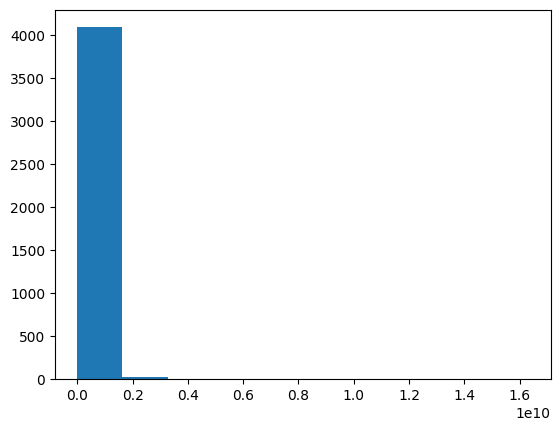

In [20]:
plt.hist(df['IssuedShares'])

In [24]:
df['33SectorName'].value_counts()

Information & Communication                      551
Services                                         521
-                                                500
Retail Trade                                     359
Wholesale Trade                                  320
Electric Appliances                              255
Machinery                                        230
Chemicals                                        218
Construction                                     170
Real Estate                                      143
Foods                                            125
Other Products                                   116
Transportation Equipment                          95
Banks                                             93
Metal Products                                    90
Pharmaceutical                                    77
Land Transportation                               62
Glass and Ceramics Products                       56
Textiles and Apparels                         

In [25]:
len(df['33SectorName'].value_counts())

34

In [31]:
# Exploring the stock price data
stock_prices = pd.read_csv("../stock_prices.csv")
stock_prices.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


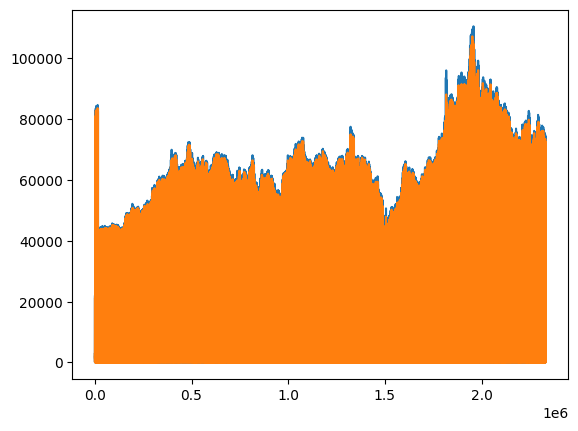

In [4]:
plt.plot(stock_prices['High'])
plt.plot(stock_prices['Low'])
plt.show()

In [5]:
stock_prices.value_counts()


RowId          Date        SecuritiesCode  Open    High    Low     Close   Volume  AdjustmentFactor  ExpectedDividend  SupervisionFlag  Target   
20170116_2590  2017-01-16  2590            6060.0  6130.0  6060.0  6060.0  125800  1.0               30.0              False             0.005051    1
20200326_8096  2020-03-26  8096            3300.0  3360.0  3215.0  3345.0  49800   1.0               65.0              False            -0.023121    1
20200326_8141  2020-03-26  8141            824.0   858.0   795.0   849.0   82500   1.0               14.0              False             0.006593    1
20200326_8140  2020-03-26  8140            2400.0  2423.0  2359.0  2414.0  88200   1.0               50.0              False            -0.021420    1
20200326_8137  2020-03-26  8137            850.0   866.0   821.0   860.0   48200   1.0               17.0              False            -0.013408    1
                                                                                                   

In [8]:
print(stock_prices.count())

RowId               2332531
Date                2332531
SecuritiesCode      2332531
Open                2324923
High                2324923
Low                 2324923
Close               2324923
Volume              2332531
AdjustmentFactor    2332531
ExpectedDividend      18865
SupervisionFlag     2332531
Target              2332293
dtype: int64


In [9]:
stock_prices['SecuritiesCode'].value_counts()

1301    1202
7282    1202
7414    1202
7412    1202
7408    1202
        ... 
4167     235
7358     234
4168     233
7342     233
4169     232
Name: SecuritiesCode, Length: 2000, dtype: int64

In [23]:
# Analysing one of the stock - Nextgen,Inc : SecurityCode 7282 
toyoda = stock_prices[stock_prices['SecuritiesCode'] == 7282]

In [24]:
toyoda.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
1239,20170104_7282,2017-01-04,7282,2775.0,2821.0,2765.0,2820.0,255200,1.0,NaN,False,-0.015346
3104,20170105_7282,2017-01-05,7282,2823.0,2832.0,2789.0,2802.0,273300,1.0,NaN,False,-0.006162
4969,20170106_7282,2017-01-06,7282,2732.0,2766.0,2732.0,2759.0,233700,1.0,NaN,False,0.016776
6834,20170110_7282,2017-01-10,7282,2730.0,2768.0,2710.0,2742.0,331800,1.0,NaN,False,-0.014706
8699,20170111_7282,2017-01-11,7282,2768.0,2790.0,2754.0,2788.0,271200,1.0,NaN,False,0.009465


In [25]:
# toyoda stock - Some random stock price analysis

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=toyoda['Date'],y=toyoda['Close'],name='Price'),secondary_y=False)
fig.add_trace(go.Bar(x=toyoda['Date'],y=toyoda['Volume'],name='Volume'),secondary_y=True)
max_vol = toyoda['Volume'].max()
fig.update_yaxes(range=[0,max_vol*5],secondary_y=True)
fig.update_yaxes(visible=False, secondary_y=True)
fig.show()

**PREPROCESSING**

In [41]:
stock_prices = pd.read_csv("../stock_prices.csv")
len(stock_prices)

2332531

In [28]:
stock_prices.isna().sum()

RowId                     0
Date                      0
SecuritiesCode            0
Open                   7608
High                   7608
Low                    7608
Close                  7608
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
dtype: int64

In [44]:
# Dropping ExpectedDividend column since it has many unknown fields 
stock_prices.drop('ExpectedDividend', axis=1, inplace=True)

In [45]:
# Now, removing the records which has not recorded the stock open and close price
# Removing these 7,608 records since it is not very significant as compared to the total records i.e. 2,332,531
stock_prices.isna().sum()

RowId                  0
Date                   0
SecuritiesCode         0
Open                7608
High                7608
Low                 7608
Close               7608
Volume                 0
AdjustmentFactor       0
SupervisionFlag        0
Target               238
dtype: int64

In [46]:
stock_prices.dropna(inplace=True)
len(stock_prices)

2324923

Now the total records is **2324923**

In [47]:
stock_prices.isna().sum()

RowId               0
Date                0
SecuritiesCode      0
Open                0
High                0
Low                 0
Close               0
Volume              0
AdjustmentFactor    0
SupervisionFlag     0
Target              0
dtype: int64

**Prediction Model - LinearRegression**

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [52]:
X_data = stock_prices.drop(['Target', 'RowId', 'Date'], axis=1)
y_data = stock_prices['Target']

print(X_data.head())
print(y_data.head())

   SecuritiesCode    Open    High     Low   Close   Volume  AdjustmentFactor  \
0            1301  2734.0  2755.0  2730.0  2742.0    31400               1.0   
1            1332   568.0   576.0   563.0   571.0  2798500               1.0   
2            1333  3150.0  3210.0  3140.0  3210.0   270800               1.0   
3            1376  1510.0  1550.0  1510.0  1550.0    11300               1.0   
4            1377  3270.0  3350.0  3270.0  3330.0   150800               1.0   

   SupervisionFlag  
0            False  
1            False  
2            False  
3            False  
4            False  
0    0.000730
1    0.012324
2    0.006154
3    0.011053
4    0.003026
Name: Target, dtype: float64


In [53]:
model.fit(X_data, y_data)

LinearRegression()